<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.3 
# *Mining Social Media on Reddit*

## The Reddit API and the PRAW Package

The Reddit API is rich and complex, with many endpoints (https://www.reddit.com/dev/api/). It includes methods for navigating its collections, which include various kinds of media as well as comments. Fortunately, the Python library PRAW reduces much of this complexity.

Reddit requires developers to create and authenticate an app before they can use the API, but the process is much less onerus than some, and does not have waiting period for approval of new developers (as of 18 August 2018).

### 1. Create a Reddit App

Go to https://www.reddit.com/prefs/apps and click "create an app".

Enter the following in the form:

- a name for your app
- select "script" radio button
- a description
- a redirect URI

(Nb. For pulling data into a data science experiment, a local port can be used for the Redirect URI; try http://127.0.0.1:1410)

![image.png](attachment:image.png)

- click "create app"
- from the form that displays, copy the following to a local text file (or to this notebook):

  - name (the name you gave to your app)
  - redirect URI
  - personal use script (this is your OAuth 2 Client ID)
  - secret (this is your OAuth 2 Secret)

### 2. Register for API Access

- follow the link at https://www.reddit.com/wiki/api and read the terms of use for Reddit API access 
- fill in the form fields at the bottom 
  - make sure to enter your new OAuth Client ID where indicated
  - your use case could be something like "Training in API usage for data science projects"
  - your platform could be something like "Jupyter Notebooks / Python"
  
- click "SUBMIT"
 
- when asked for User-Agent, enter something that fits this pattern:
  `your_os-python:your_reddit_appname:v1.0 (by /u/your_reddit_username)`

### 3. Load Python Libraries

In [2]:
pip install praw

     |████████████████████████████████| 153kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 204kB 6.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import praw
import requests
import json
import pprint
from datetime import datetime, date, time
import pandas as pd

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [2]:
my_user_agent = ''   # your user Agent string goes in here
my_client_id = ''   # your Client ID string goes in here
my_client_secret = ''   # your Secret string goes in here

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_reddit.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_client_id": "your Client ID string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_client_secret": "your Secret string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_user_agent": "your user Agent string goes in here"` <br>
`}`

Use the following code to load the credentials:  

In [3]:
pwd()  # make sure your working directory is where the file is

'/Users/allenj/Documents/DS-SYD-PT-24FEB/Module_2/Labs'

In [5]:
path_auth = '/Users/allenj/Documents/Keys/auth_reddit.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_user_agent = auth['my_user_agent']
my_client_id = auth['my_client_id']
my_client_secret = auth['my_client_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody else gets access to this notebook file 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Reddit with read-only access:

In [6]:
reddit = praw.Reddit(client_id = my_client_id, 
                     client_secret = my_client_secret, 
                     user_agent = my_user_agent)

print('Read-only = ' + str(reddit.read_only))  # Output: True

Read-only = True


In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [7]:
reddit.random_subreddit

<bound method Reddit.random_subreddit of <praw.reddit.Reddit object at 0x113b62f90>>

Consult the PRAW and Reddit API documentation. Print a few of the response members below:

In [9]:
url = "https://www.reddit.com/r/funny/comments/3g1jfi/buttons/"
submission = reddit.submission(url=url)
submission

Submission(id='3g1jfi')

Content in Reddit is grouped by topics called "subreddits". Content, called "submissions", is fetched by calling the `subreddit` method of the connection object (which is our `reddit` variable) with an argument that matches an actual topic. 

We also need to append a further method call to a "subinstance", such as one of the following:

- controversial
- gilded
- hot
- new
- rising
- top

One of the submission objects members is `title`. Fetch and print 10 submission titles from the 'learnpython' subreddit using one of the subinstances above:

In [10]:
for submission in reddit.subreddit('learnpython').hot(limit=10):
    print(submission.title)

Ask Anything Monday - Weekly Thread
A Python beginner here. I am stuck after having beginner lessons.
Are Corey Schaefer's along with Automate the Boring Stuff a good way to start learning Python as a complete Beginner?
Do you constantly reference your own old code while writing something new or am I just dense?
Holy fuck I get it now my dudes.
Learning to code is Hard
Is it normal to feel horrible when you start? My first project just crashed me ..
I am a beginner with a question
How come 8 bit variables can store values over 255?
Need an explanation


Now retrieve 10 authors:

In [11]:
for submission in reddit.subreddit('learnpython').hot(limit=10):
    print(submission.author)

AutoModerator
mauri_armora
catharsisofmind
emililililily
juanthrustman
townselturner
codinghamster_
Jacksonace99
MrDabianz
proroqq


Note that we obtained the titles and authors from separate API calls. Can we expect these to correspond to the same submissions? If not, how could we gurantee that they do?

Why doesn't the next cell produce output?

In [12]:
for submission in submissions:
    print(submission.comments)

NameError: name 'submissions' is not defined

Print two comments associated with each of these submissions:

In [13]:
submissions = reddit.subreddit('learnpython').hot(limit=10)
for submission in submissions:
    top_level_comments = list(submission.comments)
    all_comments = submission.comments.list()[:2]
    for comment in all_comments:
        print(comment.body)

Just got a laptop extremely recently, mostly focusing on learning online safety and such atm but I’m considering a career in computing. I heard Python was a good place to start. 

What is a good free resource to learn Python for someone with absolutely no computer background?
I'm trying to set up a simple script to check the current Facebook stock price. I'm using the requests module to get the HTTP to parse through. When I check to see if it worked I get a 405 error as seen below.  To me it seems the site think's it's a bot (which it is lol), so would this script just be impossible with this website?

&#x200B;

&#x200B;

**>>>** **res = requests.get('**[**https://www.marketwatch.com/investing/stock/fb**](https://www.marketwatch.com/investing/stock/fb)**')**

**>>>** **res.raise\_for\_status()**

*Traceback (most recent call last):*

*File "<stdin>", line 1, in <module>*

*File "C:\\Python27\\lib\\site-packages\\requests\\*[*models.py*](https://models.py)*", line 941, in raise\_for\_st

Referring to the API documentation, explore the submissions object and print some interesting data:

In [17]:
subreddit = reddit.subreddit('iama')
print(subreddit.display_name)
print(subreddit.title)
print(subreddit.description)

iama
IAmA
#####[Submit an AMA](https://goo.gl/GjN173)
#####[Request an AMA](https://goo.gl/zpyx5c)

# Please check out our [Rules and FAQs](https://www.reddit.com/r/IAmA/wiki/index)

# [Click here](https://askmeanythi.ng) to schedule an AMA on our calendar.

#Consider supporting our [Patreon](https://goo.gl/9sGmDN)

**AMAs are scheduled in Eastern Time (GMT-4:00).**

Date|Time|Person|Description|Remind
:-:|:-:|:-:|:-:|:-:
20 May|2:30pm|[David J. Peterson](https://www.imdb.com/name/nm4018833/)|Language Creator: Game of Thrones|[Remind](https://bit.ly/3c7HRua)
20 May|3pm|Aaron Keay|The Chairman of the BoD, The Alkaline Water Co.|[Remind](https://bit.ly/2W8GeW7)
21 May|9am|Sean from Scruffy Chicken|Newly established mobile game developer.|[Remind Me](https://bit.ly/2ZgixOK)
21 May|11am|[Ben White, Austan Goolsbee](https://en.wikipedia.org/wiki/Politico)|Reporter for Politico, Economist|[Remind](https://bit.ly/2yZNfRO)
21 May|1:30pm|[Dallas Taylor](https://en.wikipedia.org/wiki/Twenty_Thou

In [18]:
# Iterate through 10 submissions marked hot
for submission in subreddit.hot(limit=10):
    print(submission.title)
    print(submission.title)
    print(submission.id)
    print(submission.url)

/r/IAmA is recruiting new moderators, apply here!
/r/IAmA is recruiting new moderators, apply here!
gidm90
https://askmeanythi.ng/apply
A flood of coronavirus apps are tracking all of us. We're the MIT Technology Review team helping you keep track of them. Ask us anything!
A flood of coronavirus apps are tracking all of us. We're the MIT Technology Review team helping you keep track of them. Ask us anything!
gmqsez
https://www.reddit.com/r/IAmA/comments/gmqsez/a_flood_of_coronavirus_apps_are_tracking_all_of/
I'm Hasan Minhaj and I'm the host of Patriot Act on Netflix, AMA!
I'm Hasan Minhaj and I'm the host of Patriot Act on Netflix, AMA!
gm5y8i
https://www.reddit.com/r/IAmA/comments/gm5y8i/im_hasan_minhaj_and_im_the_host_of_patriot_act_on/
We're two guys that created a gum/mint company after launching the idea on Reddit. 4 years later, we just appeared on Shark Tank and have sold over 12 million pieces. AUA!
We're two guys that created a gum/mint company after launching the idea on Red

In [20]:
# Create a Pandas dataframe of basic submission stats taken from AMA

ama_title = []
time = []
num_upvotes = []
num_comments = []
upvote_ratio = []
link_flair = []
redditor = []
i=0

for submission in subreddit.top(limit=200):
    i+=1
    ama_title.append(submission.title)
    time.append(submission.created_utc)
    num_upvotes.append(submission.score)
    num_comments.append(submission.num_comments)
    upvote_ratio.append(submission.upvote_ratio)
    link_flair.append(submission.link_flair_text)
    redditor.append(submission.author)
    if i%5 == 0:
        print(f'{i} submissions completed')

5 submissions completed
10 submissions completed
15 submissions completed
20 submissions completed
25 submissions completed
30 submissions completed
35 submissions completed
40 submissions completed
45 submissions completed
50 submissions completed
55 submissions completed
60 submissions completed
65 submissions completed
70 submissions completed
75 submissions completed
80 submissions completed
85 submissions completed
90 submissions completed
95 submissions completed
100 submissions completed
105 submissions completed
110 submissions completed
115 submissions completed
120 submissions completed
125 submissions completed
130 submissions completed
135 submissions completed
140 submissions completed
145 submissions completed
150 submissions completed
155 submissions completed
160 submissions completed
165 submissions completed
170 submissions completed
175 submissions completed
180 submissions completed
185 submissions completed
190 submissions completed
195 submissions completed
200 su

In [21]:
ama_df = pd.DataFrame(
    {'ama_title': ama_title,
     'time': time,
     'num_comments': num_comments,
     'num_upvotes': num_upvotes,
     'upvote_ratio': upvote_ratio,
     'link_flair': link_flair,
     'redditor': redditor
     })

ama_df.head(10)

,ama_title,time,num_comments,num_upvotes,upvote_ratio,link_flair,redditor
0,"I am Barack Obama, President of the United Sta...",1.346270e+09,23093,216145,0.68,,PresidentObama
1,Protect Net Neutrality. Save the Internet.,1.511329e+09,2738,201651,0.88,None,root_su
2,"[AMA Request] Victoria, ex-AMA mod",1.435945e+09,2813,126771,0.81,,korantano
3,FCC just voted to kill Net Neutrality. Now we ...,1.513275e+09,2639,121799,0.79,Nonprofit,FPGauravLaroia
4,"I’m American citizen, undecided voter, loving ...",1.476408e+09,16869,116904,0.87,Politics,StanGibson18
5,"I’m Bill Gates, co-chair of the Bill & Melinda...",1.551116e+09,19459,110079,0.80,Nonprofit,thisisbillgates
6,"I’m Bill Gates, co-chair of the Bill & Melinda...",1.519757e+09,19294,105326,0.85,Nonprofit,thisisbillgates
7,"I am Leah Remini, Ask Me Anything about Scient...",1.480439e+09,17819,97725,0.90,Actor / Entertainer,TheRealLeahRemini
8,"I’m Bill Gates, co-chair of the Bill & Melinda...",1.488213e+09,16517,97540,0.85,Nonprofit,thisisbillgates
9,I am Senator Bernie Sanders. Ask Me Anything!,1.541180e+09,15299,96474,0.70,Politics,bernie-sanders


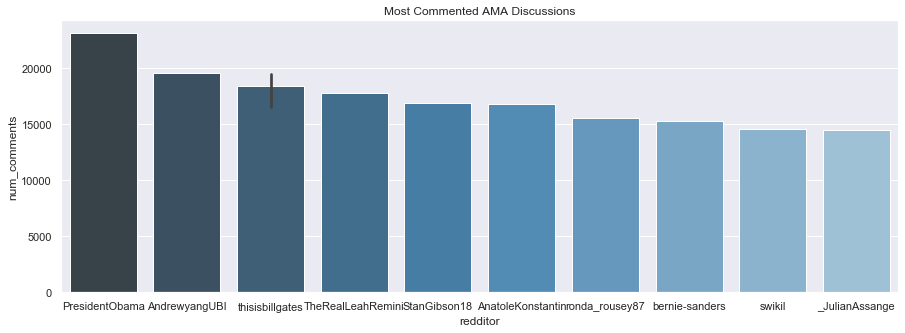

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ama_df = ama_df.sort_values(by='num_comments', ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(y=ama_df['num_comments'], x=ama_df['redditor'][:12], data=ama_df,
                 palette="Blues_d").set_title('Most Commented AMA Discussions')

#### Posting to Reddit

To be able to post to your Reddit account (i.e. contribute submissions), you need to connect to the API with read/write privilege. This requires an *authorised instance*, which is obtained by including your Reddit user name and password in the connection request: 

In [0]:
reddit = praw.Reddit(client_id='my client id',
                     client_secret='my client secret',
                     user_agent='my user agent',
                     username='my username',
                     password='my password')
print(reddit.read_only)  # Output: False

You could hide these last two credentials by adding them to your JSON file and then reading all five values at once.

>
>


>
>




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



